In [168]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from tqdm import tqdm

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(784, 64)  
        self.out = nn.Linear(64, 784)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [169]:
train_dataset = MNIST(os.getcwd(), train=True, download=True, transform=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
x_train = train_dataset.data / 255.0
x_train = torch.tensor(x_train, dtype=torch.float32)
x_train = x_train.view(-1, 784)
trainloader = DataLoader(x_train, batch_size=64, shuffle=True)

C:\Users\ianey\AppData\Local\Temp\ipykernel_16828\2340656213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)


In [170]:
def neuronalNeuralBalance(inl, oul):

    ninc = torch.zeros_like(inl.weight)
    noul = torch.zeros_like(oul.weight)

    for i in range(inl.weight.data.shape[0]):
        inc = torch.sum(torch.abs(inl.weight.data[i])).item()
        outg = torch.sum(torch.abs(oul.weight.data[:,i])).item()

        # outg = outg / float(len(oul.weight.data[:,i]))
        # inc = inc / float(len(inl.weight.data[i]))

        opt = np.sqrt(outg/inc)

        ninc[i] = inl.weight.data[i]*opt
        noul[:, i] = oul.weight.data[:,i]/opt

    inl.weight.data = ninc
    oul.weight.data = noul



In [171]:
def neuralBalance(inl, oul, order=1):
    shape = inl.weight.shape[0]
    norm = []

    prev = torch.linalg.norm(inl.weight, dim=1, ord=order)
    out = torch.linalg.norm(oul.weight, dim = 0, ord=order)

    opt = torch.sqrt(out/prev)
    inl.weight.data = inl.weight*opt.unsqueeze(1)
    oul.weight.data = oul.weight/opt

In [172]:
model = model.to('cuda')
lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

num_epochs = 20  
for epoch in range(num_epochs):
    for b in tqdm(trainloader):
        b = b.to('cuda')
        optimizer.zero_grad() 
        outputs = model(b)  
        loss = criterion(outputs, b) 

        loss.backward() 
        optimizer.step() 
    
    
    for i in range(len(lay)):
        if i > 0 and i <= len(lay)-1:
            neuronalNeuralBalance(lay[i-1][1], lay[i][1])

    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


Linear
Linear


100%|██████████| 938/938 [00:02<00:00, 435.79it/s]


Epoch 0/20, Loss: 0.037543248385190964


100%|██████████| 938/938 [00:02<00:00, 465.80it/s]


Epoch 1/20, Loss: 0.04127458482980728


100%|██████████| 938/938 [00:02<00:00, 462.82it/s]


Epoch 2/20, Loss: 0.044878941029310226


100%|██████████| 938/938 [00:02<00:00, 449.01it/s]


Epoch 3/20, Loss: 0.04755959287285805


100%|██████████| 938/938 [00:02<00:00, 462.76it/s]


Epoch 4/20, Loss: 0.06934542208909988


100%|██████████| 938/938 [00:02<00:00, 468.12it/s]


Epoch 5/20, Loss: 0.06596575677394867


100%|██████████| 938/938 [00:02<00:00, 455.37it/s]


Epoch 6/20, Loss: 0.06635650992393494


100%|██████████| 938/938 [00:02<00:00, 461.59it/s]


Epoch 7/20, Loss: 0.06282546371221542


100%|██████████| 938/938 [00:02<00:00, 462.81it/s]


Epoch 8/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 467.73it/s]


Epoch 9/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 462.76it/s]


Epoch 10/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 445.12it/s]


Epoch 11/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 456.15it/s]


Epoch 12/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 458.61it/s]


Epoch 13/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 456.64it/s]


Epoch 14/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 458.92it/s]


Epoch 15/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 457.05it/s]


Epoch 16/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 458.32it/s]


Epoch 17/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 457.79it/s]


Epoch 18/20, Loss: nan


100%|██████████| 938/938 [00:02<00:00, 466.16it/s]

Epoch 19/20, Loss: nan


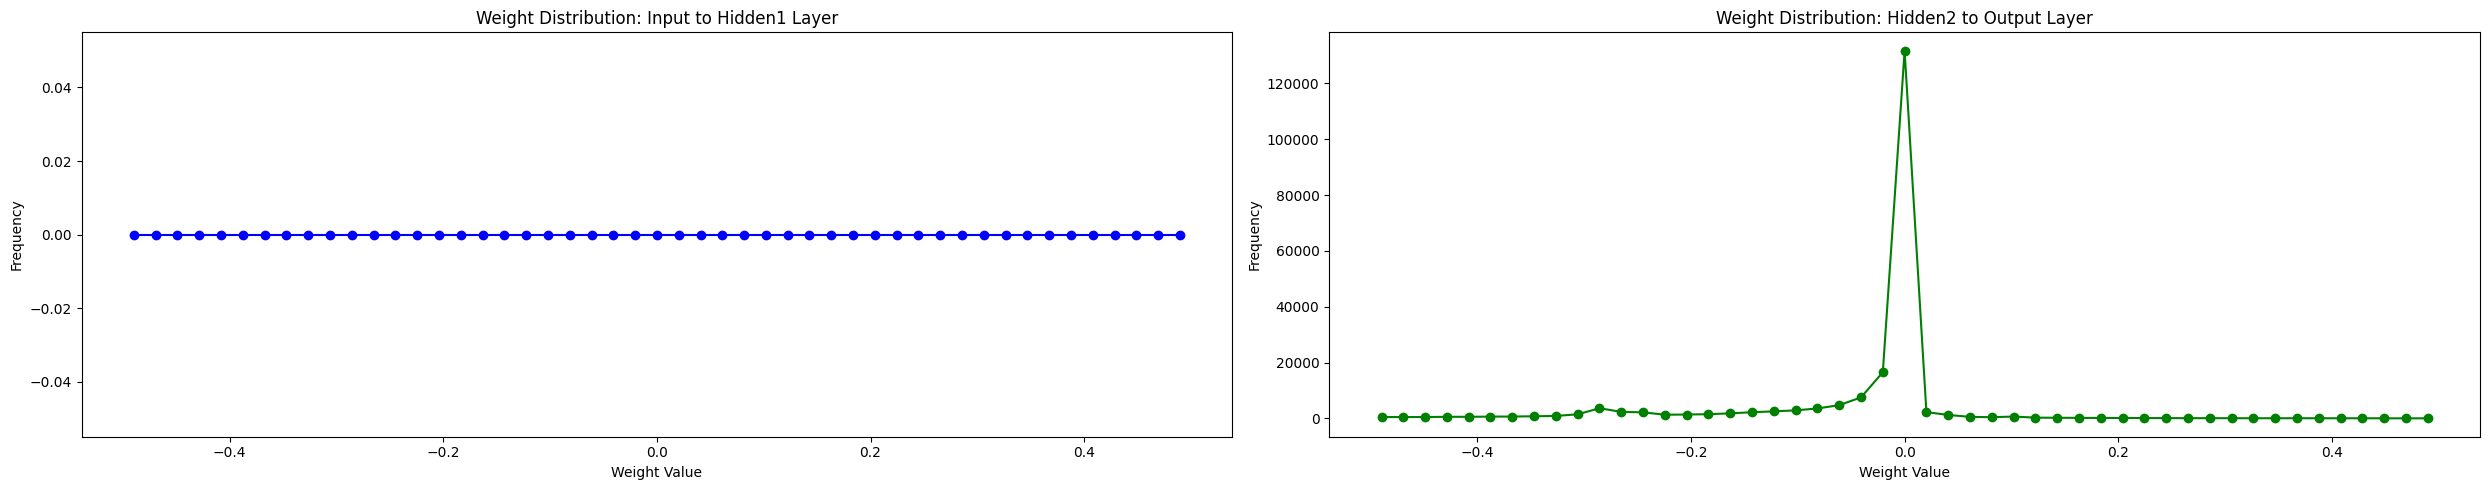

In [173]:
fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(fc2_bin_centers, fc2_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [174]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.1):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 0
Number of non-zero weights greater than 0.01 in layer 3: 0
